In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

plt.rcParams['figure.figsize'] = (12, 10)

sns.set()

In [2]:
movie_df = pd.read_csv('movies.csv')

In [3]:
genre2count = defaultdict(int)

genre_set = set()
for genre_str in movie_df['genres']:
    genre_lst = genre_str.split('|')
    for genre in genre_lst:
        genre_set.add(genre)
        genre2count[genre] += 1

no_genre_key = '(no genres listed)'
genre_set.remove(no_genre_key)
del genre2count[no_genre_key]

In [4]:
print('Genre Count Stats')
print(*genre2count.items(), sep='\n')

Genre Count Stats
('Adventure', 4145)
('Animation', 2929)
('Children', 2935)
('Comedy', 16870)
('Fantasy', 2731)
('Romance', 7719)
('Drama', 25606)
('Action', 7348)
('Crime', 5319)
('Thriller', 8654)
('Horror', 5989)
('Mystery', 2925)
('Sci-Fi', 3595)
('IMAX', 195)
('Documentary', 5605)
('War', 1874)
('Musical', 1054)
('Western', 1399)
('Film-Noir', 353)


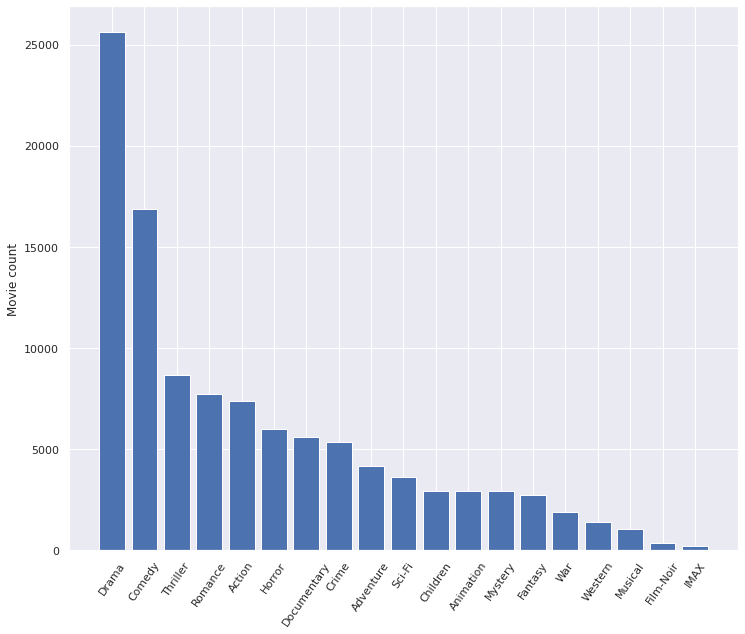

In [5]:
countgenre_pairs = [(value, key) for key, value in genre2count.items()]
countgenre_pairs.sort(reverse=True)

y, x = zip(*countgenre_pairs)

plt.xticks(rotation=55, ha='center')
plt.bar(x, y)
plt.ylabel('Movie count')
plt.show()

In [6]:
columns = list(genre_set)
columns.sort()
cooccurence_df = pd.DataFrame(0.0, index=columns, columns=columns)

cooccurence_count = defaultdict(int)
for genre_str in movie_df['genres']:
    
    if genre_str == no_genre_key:
        continue
    
    genre_lst = genre_str.split('|')
    for x, y in itertools.combinations(genre_lst, 2):
        cooccurence_count[(x, y)] += 1

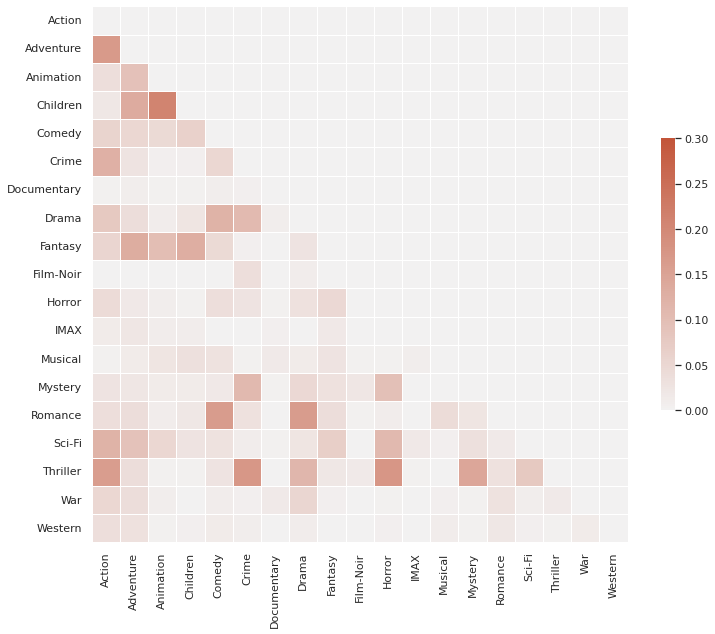

In [7]:
for key, value in cooccurence_count.items():
    genre_x, genre_y = key
    
    if genre_x < genre_y:
        cooccurence_df[genre_x][genre_y] += value
    else:
        cooccurence_df[genre_y][genre_x] += value

for genre_x, genre_y in itertools.combinations(columns, 2):
    intersection_count = cooccurence_df[genre_x][genre_y]
    union_count = genre2count[genre_x] + genre2count[genre_y] - cooccurence_df[genre_x][genre_y]
    jaccard = intersection_count / union_count
    cooccurence_df[genre_x][genre_y] = jaccard

mask = np.triu(cooccurence_df)
# sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cooccurence_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()